<a href="https://colab.research.google.com/github/Dmolight01/ProyectoModelosII/blob/main/Modelado_y_Validacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MODELADO Y VALIDACIÓN


## Nombres y apellidos de los estudiantes
Estudiante_1 ='Wilmer Mario Leiva Esteban'

Estudiante_2 ='Ricardo Osorio Castro'


Para la seleccion de modelos a trabajar nos basamos en los resultados obtenidos con la libreria Pycaret. Estos resultados pueden verse en la carpeta de github, en el notebook llamado Pycaret.ipynb


# ¡¡Enlace de descarga de la base de datos!!

Puede descargarla del siguiente link
https://drive.google.com/file/d/1ZfDISHlfVL4P42ZBD9uC1Bl82YxvFqO4/view?usp=drive_link

Tambien puede descargarla de la carpeta del github. El archivo se llama: data_resampled.csv

Despues cargue el archivo en el presente notebook.

In [1]:
#Importing all the dependencies
%load_ext autoreload
%autoreload 2
in_colab = True
import os
import sys ; sys.path.append('../drive/MyDrive/Colab Notebooks/local/data');
import pandas as pd
import numpy as np
from numpy import random
from matplotlib import pyplot as plt
from scipy import stats
import random
import math
import numpy.matlib
import functools
import scipy.io
import inspect
import time

from scipy.stats import mode
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from numpy import random
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cdist

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits, load_wine
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import (KFold, LeaveOneOut, ShuffleSplit,
                                     StratifiedKFold)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score

In [2]:
data = pd.read_csv('data_resampled.csv')

In [3]:
x = data.drop('Class', axis=1)
y = data['Class']

##1. Random Forest

Para nuestros experimentos vamos a configurar el RF para que el mínimo de muestras para considerar un nodo sea de 3.

In [4]:
def experimentar_rf(X, Y, num_trees, numero_de_variables):
    """Función que realiza experimentos de Random Forest
    X: matriz con las características
    Y: matriz de numpy con etiquetas
    num_trees: list[int]: lista con el número de árboles usado para el RF
    numero_de_variables list[int]: lista con variables para la selección del mejor umbral en cada nodo
    Retorna: dataframe con:
        -  número de árboles usados
        -  variables para la selección del mejor umbral
        - eficiencia de entrenamiento
        - desviación estándar eficiencia de entrenamiento
        - eficiencia de prueba
        - desviación estándar eficiencia de prueba
    """
    resultados = pd.DataFrame()
    idx = 0
    for trees in num_trees:
        for num_variables in numero_de_variables:
            ## para almacenar los errores intermedios
            EficienciaTrain = []
            EficienciaVal = []
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
            # llamado a la función para crear el modelo
            modelo = RandomForestClassifier(n_estimators=trees, max_features=num_variables, random_state=42)
            # entrenando...
            modelo.fit(X=X_train, y=Y_train)
            # predicción con las muestras de entrenamiento
            Y_train_pred = modelo.predict(X_train)
            ## predicción con las muestras de prueba
            Y_test_pred = modelo.predict(X_test)
            # Evaluamos las predicciones del modelo con los datos de test
            EficienciaTrain.append(np.mean(Y_train_pred.ravel() == Y_train.ravel()))
            EficienciaVal.append(np.mean(Y_test_pred.ravel() == Y_test.ravel()))

            resultados.loc[idx, 'número de árboles'] = trees
            resultados.loc[idx, 'variables para la selección del mejor umbral'] = num_variables
            resultados.loc[idx, 'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
            resultados.loc[idx, 'std(train)'] = np.std(EficienciaTrain)
            resultados.loc[idx, 'eficiencia de prueba'] = np.mean(EficienciaVal)
            resultados.loc[idx, 'std(test)'] = np.std(EficienciaVal)
            idx += 1
        print(f"Termina para {trees} árboles")

    return resultados


Analicemos el comportamiento del modelo anterior con diferentes número de árboles

In [5]:
arboles = [5,20,50,100, 150]
variables_seleccion = [2,5,10, x.shape[1]]
# reemplaza por la funcion
resultados_rf = experimentar_rf(X=x, Y=y, num_trees=arboles, numero_de_variables=variables_seleccion)
resultados_rf

Termina para 5 árboles
Termina para 20 árboles
Termina para 50 árboles
Termina para 100 árboles
Termina para 150 árboles


,número de árboles,variables para la selección del mejor umbral,eficiencia de entrenamiento,std(train),eficiencia de prueba,std(test)
0,5.0,2.0,0.998771,0.0,0.980392,0.0
1,5.0,5.0,1.000000,0.0,0.960784,0.0
2,5.0,10.0,0.998771,0.0,0.970588,0.0
3,5.0,52.0,0.995086,0.0,0.965686,0.0
4,20.0,2.0,1.000000,0.0,0.995098,0.0
5,20.0,5.0,1.000000,0.0,0.985294,0.0
6,20.0,10.0,1.000000,0.0,0.975490,0.0
7,20.0,52.0,1.000000,0.0,0.965686,0.0
8,50.0,2.0,1.000000,0.0,0.995098,0.0
9,50.0,5.0,1.000000,0.0,0.995098,0.0


In [6]:
print("Diferencia promedio entre entrenamiento y prueba del RF",
      resultados_rf['eficiencia de entrenamiento'].mean()-resultados_rf['eficiencia de prueba'].mean())

Diferencia promedio entre entrenamiento y prueba del RF 0.021445175121645788


Dados los resultados, podemos observar que los mejores hiperparametros, considerando los recursos a utilizar, para Random Forest son:
mejor_numero_arboles = 20
mejor_numero_variables = 2

Con estos datos, vamos a entrenar el modelo y luego calcular las métricas de evaluación (accuracy, recall y precision) en el conjunto de prueba.

In [7]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Seleccionar los mejores hiperparámetros
mejor_numero_arboles = 20
mejor_numero_variables = 2

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo con los mejores hiperparámetros
modelo_rf_optimizado = RandomForestClassifier(n_estimators=mejor_numero_arboles,
                                              max_features=mejor_numero_variables,
                                              random_state=42)
modelo_rf_optimizado.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_test = modelo_rf_optimizado.predict(X_test)

# Evaluar el rendimiento del modelo en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy en el conjunto de prueba:", accuracy_test)


Accuracy en el conjunto de prueba: 0.9950980392156863


In [8]:
def evaluar_modelo(X_train, X_test, y_train, y_test, mejor_numero_arboles, mejor_numero_variables):
    # Crear y entrenar el modelo con los mejores hiperparámetros
    modelo = RandomForestClassifier(n_estimators=mejor_numero_arboles,
                                     max_features=mejor_numero_variables,
                                     random_state=42)
    modelo.fit(X_train, y_train)

    # Predicciones en el conjunto de prueba
    y_pred_test = modelo.predict(X_test)

    # Calcular métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)

    return accuracy, recall, precision

# Entrenar y evaluar modelo Random Forest con mejores hiperparámetros
accuracy_rf, recall_rf, precision_rf = evaluar_modelo(X_train, X_test, y_train, y_test, mejor_numero_arboles, mejor_numero_variables)

# Crear tabla con los resultados
resultados_test = pd.DataFrame(columns=['Modelo', 'Accuracy', 'Recall', 'Precision'])
resultados_test.loc[0] = ['Random Forest', accuracy_rf, recall_rf, precision_rf]

print(resultados_test)


          Modelo  Accuracy  Recall  Precision
0  Random Forest  0.995098     1.0   0.990566


Hay que considerar la posibilidad de sobreajuste del modelo, especialmente cuando se obtiene un rendimiento perfecto en los datos de prueba. Para realizar una evaluación más exhaustiva, utilizamos validación cruzada, para confirmar la generalización del modelo a datos no vistos.

In [9]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Definir los parámetros a ajustar
param_grid = {
    'n_estimators': [5, 20, 50, 100, 150],
    'max_features': [2, 5, 10, X_train.shape[1]]
}

# Definir el modelo
modelo_rf = RandomForestClassifier(random_state=42)

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(modelo_rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
mejor_modelo = grid_search.best_estimator_

# Realizar la validación cruzada con el mejor modelo
scores = cross_val_score(mejor_modelo, x, y, cv=5, scoring='accuracy')

# Imprimir los puntajes de validación cruzada
print("Puntajes de validación cruzada:", scores)
print("Precisión media:", scores.mean())
print("Desviación estándar de la precisión:", scores.std())


Puntajes de validación cruzada: [1.         0.98039216 0.98039216 0.99014778 0.98522167]
Precisión media: 0.9872307543707137
Desviación estándar de la precisión: 0.007336646694444087


##2. Gradient Boosted Trees

Experimentaremos con diferentes número de árboles y diferente número mínimo de muestras para considerar una división de un nodo

In [10]:
def experimentar_gbt(num_trees, min_samples_split_values, X, Y):
    resultados = pd.DataFrame()

    for trees in num_trees:
        for min_samples_split in min_samples_split_values:
            EficienciaTrain = []
            EficienciaVal = []

            X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

            modelo = GradientBoostingClassifier(n_estimators=trees, min_samples_split=min_samples_split)
            modelo.fit(X=X_train, y=Y_train)

            Y_train_pred = modelo.predict(X_train)
            Y_test_pred = modelo.predict(X_test)

            EficienciaTrain.append(np.mean(Y_train_pred.ravel() == Y_train.ravel()))
            EficienciaVal.append(np.mean(Y_test_pred.ravel() == Y_test.ravel()))

            resultados.loc[len(resultados), 'número de árboles'] = trees
            resultados.loc[len(resultados) - 1, 'min_samples_split'] = min_samples_split
            resultados.loc[len(resultados) - 1, 'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
            resultados.loc[len(resultados) - 1, 'std(train)'] = np.std(EficienciaTrain)
            resultados.loc[len(resultados) - 1, 'eficiencia de prueba'] = np.mean(EficienciaVal)
            resultados.loc[len(resultados) - 1, 'std(test)'] = np.std(EficienciaVal)

    return resultados



In [11]:
num_trees = [5, 10, 20, 50, 100]
min_samples_split_values = [3, 4, 5, 6, 7]
resultados_gbt = experimentar_gbt(num_trees=num_trees, min_samples_split_values=min_samples_split_values, X=x, Y=y)
resultados_gbt

,número de árboles,min_samples_split,eficiencia de entrenamiento,std(train),eficiencia de prueba,std(test)
0,5.0,3.0,0.902948,0.0,0.852941,0.0
1,5.0,4.0,0.902948,0.0,0.852941,0.0
2,5.0,5.0,0.902948,0.0,0.852941,0.0
3,5.0,6.0,0.902948,0.0,0.852941,0.0
4,5.0,7.0,0.902948,0.0,0.852941,0.0
5,10.0,3.0,0.926290,0.0,0.867647,0.0
6,10.0,4.0,0.923833,0.0,0.867647,0.0
7,10.0,5.0,0.923833,0.0,0.867647,0.0
8,10.0,6.0,0.923833,0.0,0.867647,0.0
9,10.0,7.0,0.923833,0.0,0.867647,0.0


In [12]:
num_trees = [5, 10, 20, 50, 100]
min_samples_split_values = [8, 9, 10, 11]
resultados_gbt = experimentar_gbt(num_trees=num_trees, min_samples_split_values=min_samples_split_values, X=x, Y=y)
resultados_gbt

,número de árboles,min_samples_split,eficiencia de entrenamiento,std(train),eficiencia de prueba,std(test)
0,5.0,8.0,0.902948,0.0,0.852941,0.0
1,5.0,9.0,0.902948,0.0,0.852941,0.0
2,5.0,10.0,0.902948,0.0,0.852941,0.0
3,5.0,11.0,0.902948,0.0,0.852941,0.0
4,10.0,8.0,0.923833,0.0,0.867647,0.0
5,10.0,9.0,0.923833,0.0,0.867647,0.0
6,10.0,10.0,0.922604,0.0,0.867647,0.0
7,10.0,11.0,0.923833,0.0,0.867647,0.0
8,20.0,8.0,0.959459,0.0,0.901961,0.0
9,20.0,9.0,0.958231,0.0,0.901961,0.0


Podemos observar que los mejores hiperparametros en este caso son:
Número de arboles=50, numero mínimo de muestras para considerar una división de un nodo: 3


Entrenemos el modelo

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo con 100 árboles
modelo_gbt = GradientBoostingClassifier(n_estimators=50, min_samples_split=3, random_state=42)
modelo_gbt.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_test = modelo_gbt.predict(X_test)

# Evaluar el rendimiento del modelo en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)

print("Accuracy en el conjunto de prueba:", accuracy_test)
print("Precision en el conjunto de prueba:", precision_test)
print("Recall en el conjunto de prueba:", recall_test)

Accuracy en el conjunto de prueba: 0.9509803921568627
Precision en el conjunto de prueba: 0.9279279279279279
Recall en el conjunto de prueba: 0.9809523809523809


Hacemos validacion cruzada

In [14]:
# Crear el modelo Gradient Boosted Trees con 100 árboles
modelo_gbt = GradientBoostingClassifier(n_estimators=50, min_samples_split=3, random_state=42)

# Realizar validación cruzada
puntajes_cv = cross_val_score(modelo_gbt, x, y, cv=5)

# Imprimir los puntajes de validación cruzada
print("Puntajes de validación cruzada:", puntajes_cv)
print("Precisión media:", puntajes_cv.mean())
print("Desviación estándar de la precisión:", puntajes_cv.std())


Puntajes de validación cruzada: [0.97058824 0.94607843 0.96078431 0.97536946 0.94581281]
Precisión media: 0.9597266492804017
Desviación estándar de la precisión: 0.012195564833029556


##3. Decision Tree Classifier

Vamos a configurar el árbol con la medida de impureza Entropia

In [15]:
def experimentar_dt(X, Y, depths):
    """Función que realiza experimentos de árboles de decisión sin normalización.

    Args:
        X: matriz con las características
        Y: matriz de numpy con etiquetas
        depths: lista con la profundidad de árboles a experimentar

    Returns:
        DataFrame con:
            - profundidad del árbol
            - eficiencia de entrenamiento
            - desviación estándar de la eficiencia de entrenamiento
            - eficiencia de prueba
            - desviación estándar de la eficiencia de prueba
    """
    resultados = pd.DataFrame()

    for depth in depths:
        # Para almacenar los errores intermedios
        EficienciaTrain = []
        EficienciaVal = []

        # Dividir los datos en entrenamiento y prueba
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

        # Se crea y entrena el modelo usando los datos de entrenamiento
        modelo = DecisionTreeClassifier(max_depth=depth, criterion="entropy")
        modelo.fit(X=X_train, y=Y_train)

        # Predecir con los datos de entrenamiento y prueba
        Y_train_pred = modelo.predict(X_train)
        Y_test_pred = modelo.predict(X_test)

        # Evaluar las predicciones
        EficienciaTrain.append(np.mean(Y_train_pred == Y_train))
        EficienciaVal.append(np.mean(Y_test_pred == Y_test))

        resultados.loc[depth, 'profundidad del árbol'] = depth
        resultados.loc[depth, 'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
        resultados.loc[depth, 'std(train)'] = np.std(EficienciaTrain)
        resultados.loc[depth, 'eficiencia de prueba'] = np.mean(EficienciaVal)
        resultados.loc[depth, 'std(test)'] = np.std(EficienciaVal)

    return resultados


   profundidad del árbol  eficiencia de entrenamiento  std(train)  \
0                   10.0                          1.0         0.0   
1                   20.0                          1.0         0.0   
2                   30.0                          1.0         0.0   
3                   50.0                          1.0         0.0   

   eficiencia de prueba  std(test)  
0              0.950980        0.0  
1              0.955882        0.0  
2              0.950980        0.0  
3              0.960784        0.0  


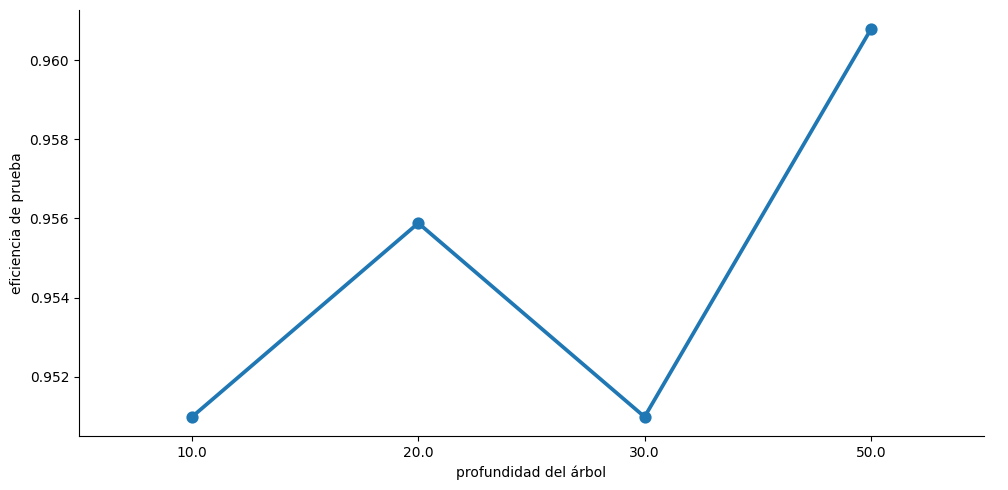

In [23]:
# Realizar los experimentos para observar los efectos
resultados_dt = []
depths = [10, 20, 30, 50]

for depth in depths:
    # Usa tu función
    resultados_parciales = experimentar_dt(X=x, Y=y, depths=[depth])
    resultados_dt.append(resultados_parciales)

resultados_dt = pd.concat(resultados_dt, ignore_index=True)

print(resultados_dt)


# Graficar los resultados
sns.catplot(data=resultados_dt,
            x='profundidad del árbol',
            y='eficiencia de prueba',
            kind='point',
            aspect=2)

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'max_depth': [10, 20, 30, 50, None]  # Ejemplo de valores para la profundidad del árbol
}

# Crear un objeto Grid Search
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

# Entrenar el Grid Search
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)


Mejores hiperparámetros: {'max_depth': 30}


Ahora vamos a visualizar el arbol con su mejor profundidad

ccp_alpha = 0.0


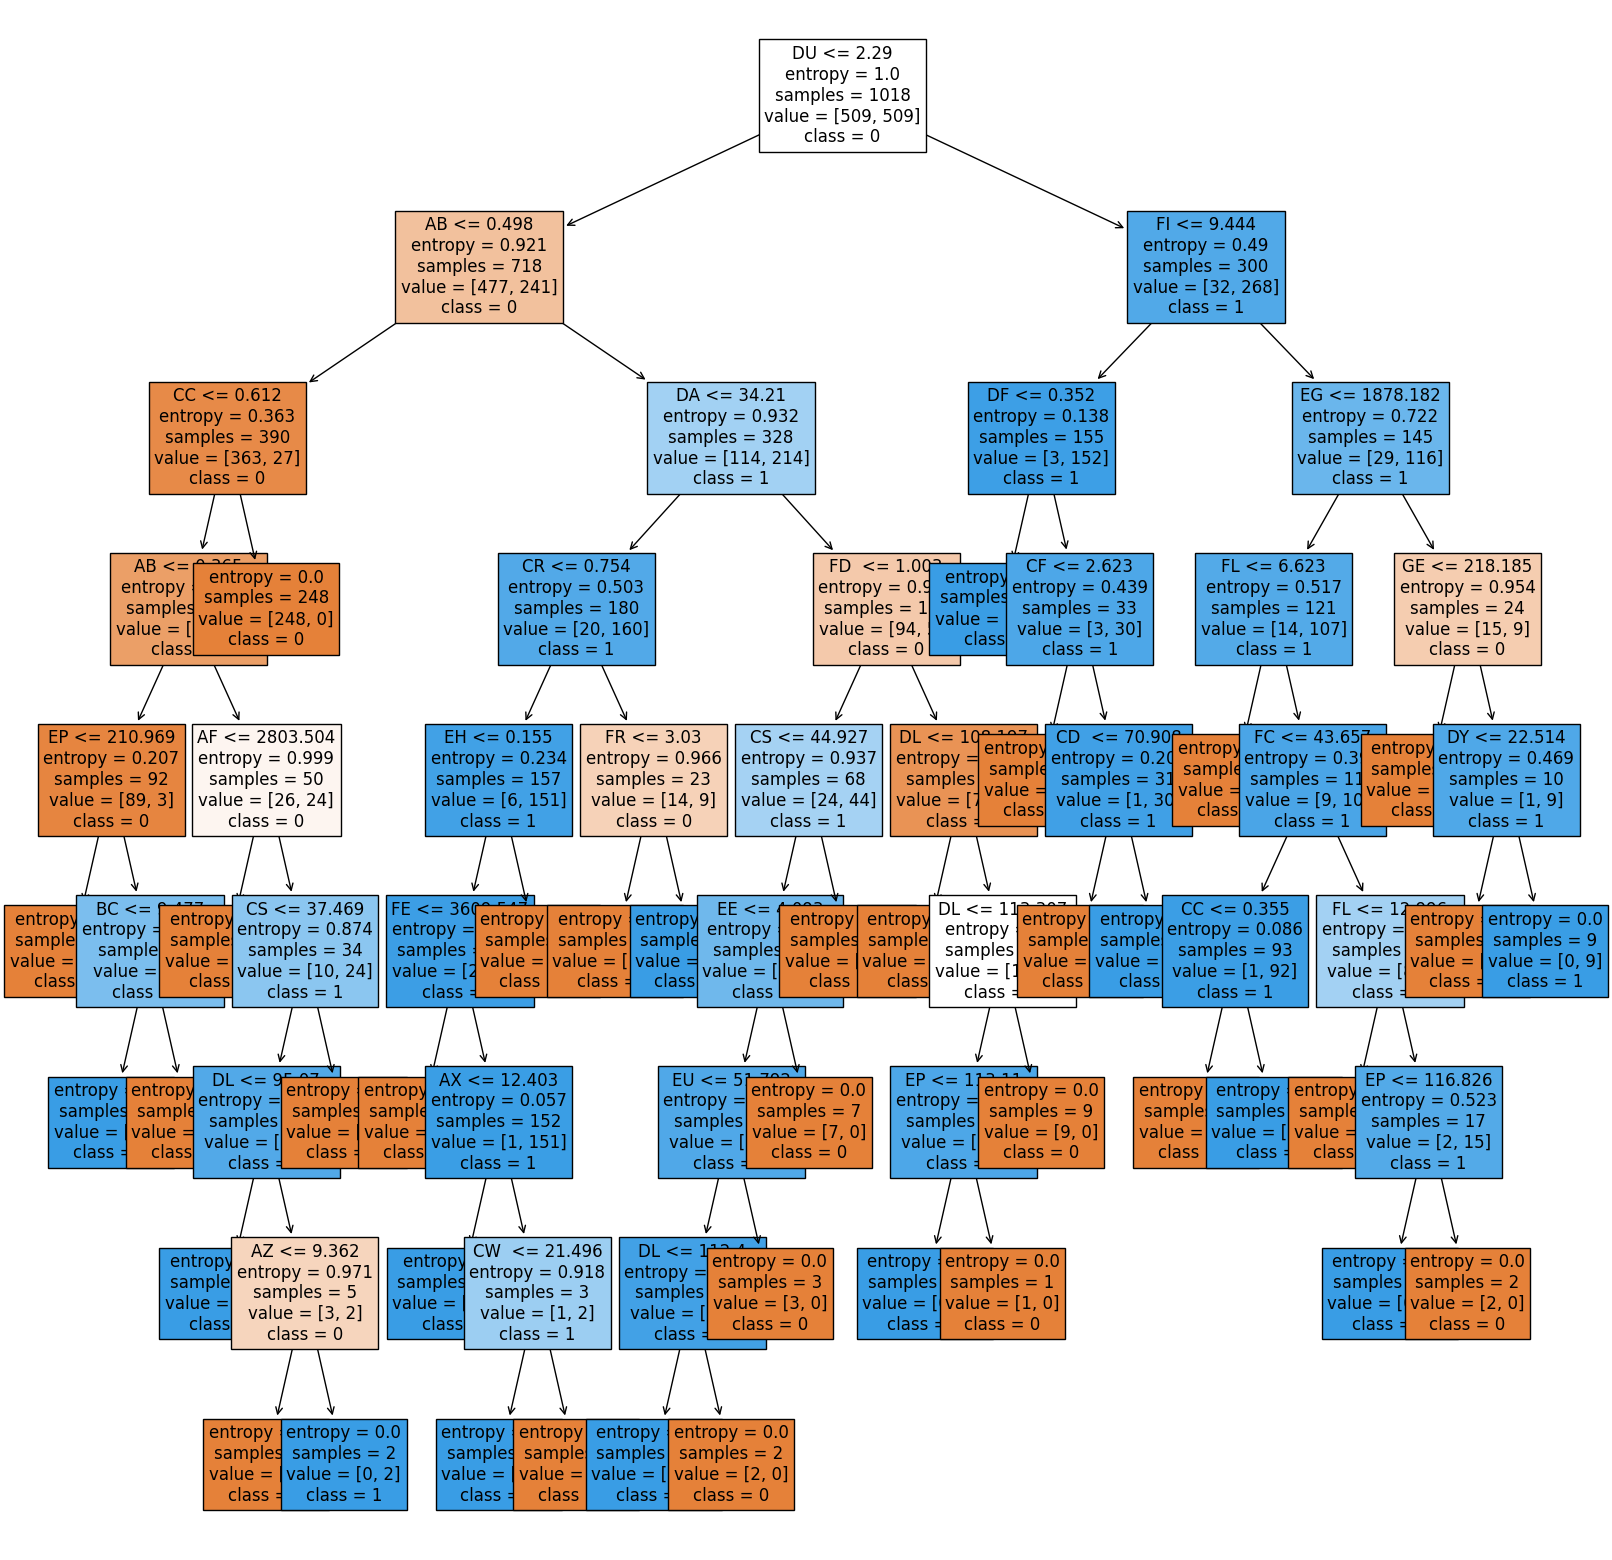

In [25]:
# se usa para visualizar el DT
from sklearn import tree
# complete la siguiente línea de código: reemplace por el mejor valor de profundidad obtenido
# Obtener nombres de características de las columnas de X
nombres_caracteristicas = list(x.columns)

# Obtener nombres de clases únicas de Y
nombres_clases = np.unique(y).astype(str)
mejor_profundidad = 30
modelo = DecisionTreeClassifier(max_depth=mejor_profundidad, criterion="entropy", ccp_alpha =0.0)
modelo.fit(x, y)
plt.figure(figsize=(20,20))
tree.plot_tree(modelo, filled=True, class_names=nombres_clases, feature_names=nombres_caracteristicas, fontsize=12)
print("ccp_alpha = 0.0")
plt.show()

ccp_alpha = 0.5


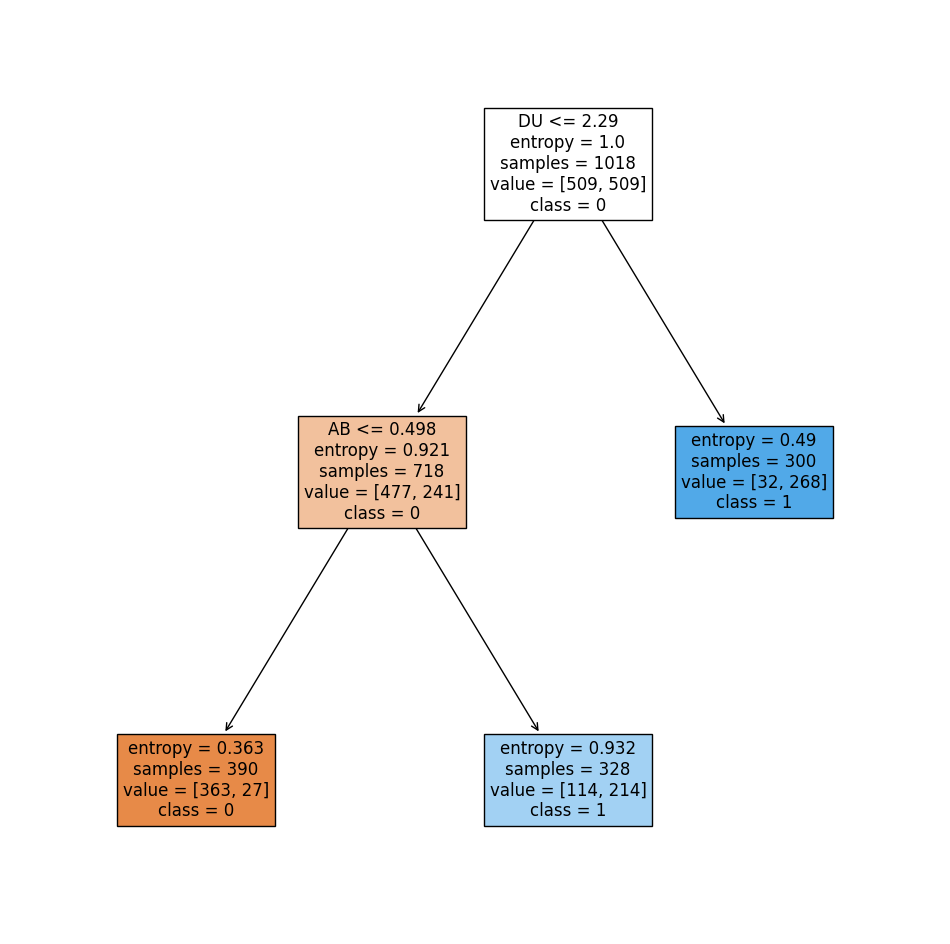

In [26]:
# Visualicemos el árbol anterior pero con ccp_alpha = 0.2
nombres_caracteristicas = list(x.columns)

# Obtener nombres de clases únicas de Y
nombres_clases = np.unique(y).astype(str)

modelo = DecisionTreeClassifier(max_depth=30, criterion="entropy", ccp_alpha =0.2)
modelo.fit(x, y)
plt.figure(figsize=(12,12))
tree.plot_tree(modelo, filled=True, class_names=nombres_clases, feature_names=nombres_caracteristicas, fontsize=12)
print("ccp_alpha = 0.5")
plt.show()

In [27]:
# Entrenar el modelo con profundidad 30
modelo_arbol_decision = DecisionTreeClassifier(max_depth=30)
modelo_arbol_decision.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
predicciones_prueba = modelo_arbol_decision.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, predicciones_prueba)
precision = precision_score(y_test, predicciones_prueba)
recall = recall_score(y_test, predicciones_prueba)

# Crear tabla de resultados
resultados = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall'],
    'Valor': [accuracy, precision, recall]
})

print("Resultados en el conjunto de prueba:")
print(resultados)


Resultados en el conjunto de prueba:
     Métrica     Valor
0   Accuracy  0.946078
1  Precision  0.905172
2     Recall  1.000000


Hagamos validacion cruzada

In [28]:
# Definir el modelo con profundidad 30
modelo_arbol_decision_cv = DecisionTreeClassifier(max_depth=30)

# Realizar la validación cruzada
puntajes_cv = cross_val_score(modelo_arbol_decision_cv, x, y, cv=5, scoring='accuracy')

# Calcular la precisión media y la desviación estándar de los puntajes
precision_media = puntajes_cv.mean()
std_precision = puntajes_cv.std()

print("Puntajes de validación cruzada:", puntajes_cv)
print("Precisión media:", precision_media)
print("Desviación estándar de la precisión:", std_precision)


Puntajes de validación cruzada: [0.95098039 0.90686275 0.94607843 0.94581281 0.94581281]
Precisión media: 0.9391094368781994
Desviación estándar de la precisión: 0.016243189094990316
